<a href="https://colab.research.google.com/github/ahmadhajmosa/Machine-Learning-Lab-2020/blob/master/Session_3_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab on Machine Learning and Applications in Intelligent Vehicles
## Session 3: Keras

### * Intro into Keras

### * CNN using Keras

### * LSTM using Keras

### * Variational Auto encoder using Keras

### * Seq2Seq Model with keras


In [0]:
!pip install pydot



In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input



model = Sequential()
model.add(Dense(32, input_shape=(16,),name="input_layer"))
model.add(Dense(100,activation="relu",name="hidden_layer_1"))
model.add(Dropout(0.1))
model.add(Dense(200,activation="sigmoid",name="hidden_layer_2"))
model.add(Dropout(0.1))
model.add(Dense(30,name="hidden_layer_3"))
model.add(Dense(100,name="hidden_layer_4"))

# now the model will take as input arrays of shape (*, 16)
# and output arrays of shape (*, 32)

# after the first layer, you don't need to specify
# the size of the input anymore:
model.add(Dense(32,name="output_layer"))




#
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 32)                544       
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 100)               3300      
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 200)               20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 200)               0         
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 30)                6030      
_________________________________________________________________
hidden_layer_4 (Dense)       (None, 100)               3100      
__________

In [0]:
from keras.layers import Conv2D, Flatten

model = Sequential()
model.add(Conv2D(64, (3, 3),
                 input_shape=(3, 32, 32), padding='same',))
model.add(Conv2D(20, (3, 3),padding='same'))


# now: model.output_shape == (None, 64, 32, 32)
# now: model.input_shape == (None, 3, 32, 32)

model.add(Flatten())


from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

display(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 3, 32, 64)         18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 32, 20)         11540     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1920)              0         
Total params: 30,036
Trainable params: 30,036
Non-trainable params: 0
_________________________________________________________________


None

In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)# labels =[1,2,1,3] --> [[1,0,0],[0,1,0],[0,1,0],[0,0,1]]
y_test = keras.utils.to_categorical(y_test, num_classes)


# Model creation

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))

model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop

# binary_corrsentropy for binary classificaiton 2 classes
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


# scaling from 0-255 to 0-1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

model.summary()

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 17s 330us/step - loss: 1.8029 - acc: 0.3412 - val_loss: 1.5063 - val_acc: 0.4508
Epoch 2/100
50000/50000 [==============================] - 11s 213us/step - loss: 1.4711 - acc: 0.4675 - val_loss: 1.3421 - val_acc: 0.5142
Epoch 3/100
50000/50000 [==============================] - 11s 211us/step - loss: 1.3287 - acc: 0.5255 - val_loss: 1.2082 - val_acc: 0.5755
Epoch 4/100
50000/50000 [==============================] - 11s 215us/step - loss: 1.2255 - acc: 0.5682 - val_loss: 1.1168 - val_acc: 0.6103
Epoch 5/100
50000/50000 [==============================] - 11s 211us/step - loss: 1.1434 - acc: 0.5982 - val_loss: 1.0550 - val_acc: 0.6329
Epoch 6/100
50000/50000 [==============================] - 11s 211us/step - loss: 1.0756 - acc: 0.6231 - val_loss: 0.9970 - val_a

KeyboardInterrupt: ignored

In [1]:
from keras.layers import Input, Dense, Concatenate
from keras.models import Model

# This returns a tensor
inputs = Input(shape=(784,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)


# This returns a tensor
inputs_1 = Input(shape=(10,))

# a layer instance is callable on a tensor, and returns a tensor
x_1 = Dense(64, activation='relu')(inputs_1)
x_1 = Dense(64, activation='relu')(x_1)


merged = Concatenate()([x,x_1])  # x=[1,2,3]  x_1=[4,3,1] Concat->[1,2,4,4,3,1]

y = Dense(64, activation='relu')(merged)
y = Dense(64, activation='relu')(y)

y_plus_1 =Dense(10, activation='softmax',name='output1')(y)
y_plus_2 =Dense(20, activation='relu', name='output2')(y)

losses = dict()
losses['output1'] ='categorical_crossentropy'
losses['output2'] ='mse'


metrics = dict()
metrics['output1'] ='acc'
metrics['output2'] ='mse'

model = Model([inputs,inputs_1],[y_plus_1,y_plus_2]) #

model.compile(optimizer='adam',loss=losses, metrics=metrics)

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))
model.summary()

import numpy as np

input1= np.random.rand(1,784)
input2= np.random.rand(1,10)


output1,output2 = model.predict([input1,input2])

display(output1.shape)
display(output2.shape)

Using TensorFlow backend.


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 10)           0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 64)           50240       input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 64)           704         input_2[0][0]                    
____________________________________________________________________________________________

(1, 10)

(1, 20)

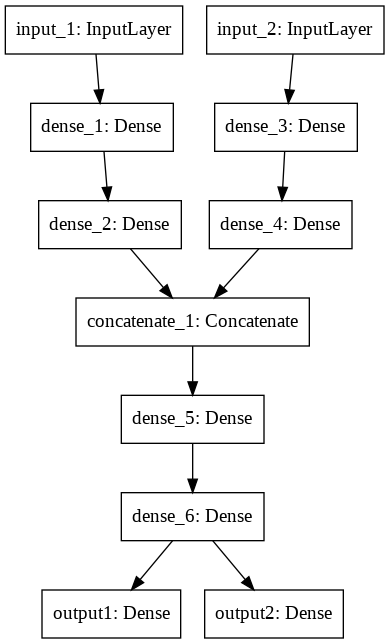

In [4]:
import keras
keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [0]:
#concat ---> Dense ---> Dense 1 ----> Dense 11. ---> Cocat --> Dense - > ou1 
                   #---> Dense 2 ----> Dense 22                      - > ou2 



In [0]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

data_dim = 16
timesteps = 8
num_classes = 10

# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(32, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32))  # return a single vector of dimension 32
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 8, 32)             6272      
_________________________________________________________________
lstm_4 (LSTM)                (None, 8, 32)             8320      
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_63 (Dense)             (None, 10)                330       
Total params: 23,242
Trainable params: 23,242
Non-trainable params: 0
_________________________________________________________________
